# Importación de Bibliotecas

In [3]:
import pandas as pd
import numpy as np
import sys
from itertools import combinations, groupby
from collections import Counter
from IPython.display import display
from sklearn.impute import SimpleImputer

# Fase 1. Preprocesamiento y Exploración

## 1. Carga de Datos e Inspección Inicial

In [4]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Cargar el conjunto de datos (ajustar la codificación si es necesario)
file_path = "/content/drive/MyDrive/DM_PRJ/hubway_202304_to_202506_1M_Rows.csv"
df = pd.read_csv(file_path, low_memory=False)

# Convertir columnas de fecha y hora
df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'], errors='coerce')

# Mostrar las primeras filas
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,periodo
0,1B02948DE59E8569,docked_bike,2023-05-22 16:16:20,2023-05-22 17:06:23,Williams St at Washington St,D32040,NCAAA - Walnut Ave at Crawford St,B32027,42.306539,-71.107669,42.316902,-71.091946,casual,202305
1,2BE9101C51CE35C7,docked_bike,2023-05-24 08:34:32,2023-05-24 08:56:35,Hyde Square - Barbara St at Centre St,E32003,Ames St at Main St,M32037,42.321765,-71.109842,42.362500,-71.088220,member,202305
2,94F7AB01EEB17B46,docked_bike,2023-05-16 08:50:27,2023-05-16 09:13:17,Hyde Square - Barbara St at Centre St,E32003,Ames St at Main St,M32037,42.321765,-71.109842,42.362500,-71.088220,member,202305
3,CA41B2A252B0602B,docked_bike,2023-05-16 14:29:21,2023-05-16 14:44:33,Hyde Square - Barbara St at Centre St,E32003,St. Alphonsus St at Tremont St,B32063,42.321765,-71.109842,42.333293,-71.101246,member,202305
4,71FF67C0F5AE9D57,docked_bike,2023-05-25 07:26:53,2023-05-25 07:52:34,Williams St at Washington St,D32040,Washington St at Fuller St,C32084,42.306539,-71.107669,42.281986,-71.071479,casual,202305


## 2. Información Básica y Tipos de Datos

In [6]:
# Resumen de tipos de datos y recuentos no nulos
df.info()

# Estadísticas descriptivas (incluye fecha y hora y categóricas)
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   ride_id             1000000 non-null  object        
 1   rideable_type       1000000 non-null  object        
 2   started_at          683884 non-null   datetime64[ns]
 3   ended_at            683884 non-null   datetime64[ns]
 4   start_station_name  999882 non-null   object        
 5   start_station_id    999882 non-null   object        
 6   end_station_name    995465 non-null   object        
 7   end_station_id      995437 non-null   object        
 8   start_lat           1000000 non-null  float64       
 9   start_lng           1000000 non-null  float64       
 10  end_lat             995930 non-null   float64       
 11  end_lng             995930 non-null   float64       
 12  member_casual       1000000 non-null  object        
 13  periodo      

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,periodo
count,1000000,1000000,683884,683884,999882,999882,995465,995437,1000000.000000,1000000.000000,995930.000000,995930.000000,1000000,1000000.000000
unique,1000000,3,NaN,NaN,527,520,527,520,NaN,NaN,NaN,NaN,2,NaN
top,02B475DF99CB2FE0,docked_bike,NaN,NaN,MIT at Mass Ave / Amherst St,M32006,MIT at Mass Ave / Amherst St,M32006,NaN,NaN,NaN,NaN,member,NaN
freq,1,683884,NaN,NaN,21954,21954,26486,26486,NaN,NaN,NaN,NaN,707344,NaN
mean,NaN,NaN,2023-05-03 13:31:33.526978304,2023-05-03 14:07:25.123711488,NaN,NaN,NaN,NaN,42.358952,-71.090157,42.358924,-71.089833,NaN,202337.895889
min,NaN,NaN,2023-04-01 00:00:16,2023-04-01 00:06:31,NaN,NaN,NaN,NaN,42.167226,-71.247759,42.167226,-71.250000,NaN,202304.000000
25%,NaN,NaN,2023-04-17 19:11:25.249999872,2023-04-17 19:47:32.249999872,NaN,NaN,NaN,NaN,42.348359,-71.108100,42.348100,-71.107072,NaN,202304.000000
50%,NaN,NaN,2023-05-05 15:37:41,2023-05-05 15:56:14.500000,NaN,NaN,NaN,NaN,42.358920,-71.091156,42.358920,-71.090179,NaN,202305.000000
75%,NaN,NaN,2023-05-18 08:37:28.750000128,2023-05-18 08:58:08.249999872,NaN,NaN,NaN,NaN,42.368844,-71.071190,42.368605,-71.071163,NaN,202410.000000
max,NaN,NaN,2023-05-31 23:59:14,2023-06-07 18:50:53,NaN,NaN,NaN,NaN,42.534669,-70.870214,42.534669,-70.870214,NaN,202410.000000


## 3. Manejo de Valores Faltantes

In [7]:
print("Valores faltantes antes de la manipulación:")
print(df.isnull().sum())

# Manejar valores faltantes: Eliminar filas donde falta información crítica (tiempos o detalles de la estación)
# Esto asegura que solo analizamos viajes completos y datos de estaciones válidos.
df.dropna(subset=['started_at', 'ended_at', 'start_station_name', 'start_station_id',
                  'end_station_name', 'end_station_id', 'start_lat', 'start_lng',
                  'end_lat', 'end_lng'], inplace=True)
print("\nValores faltantes después de eliminar filas con datos críticos faltantes:")
print(df.isnull().sum())

Valores faltantes antes de la manipulación:
ride_id                    0
rideable_type              0
started_at            316116
ended_at              316116
start_station_name       118
start_station_id         118
end_station_name        4535
end_station_id          4563
start_lat                  0
start_lng                  0
end_lat                 4070
end_lng                 4070
member_casual              0
periodo                    0
dtype: int64

Valores faltantes después de eliminar filas con datos críticos faltantes:
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
periodo               0
dtype: int64


## 4. Eliminación de Duplicados

In [8]:
initial_rows = len(df)
df.drop_duplicates(subset=['ride_id'], inplace=True)
print(f"\nEliminadas {initial_rows - len(df)} filas duplicadas basadas en 'ride_id'.")
print(f"El DataFrame ahora tiene {len(df)} filas después de eliminar duplicados.")

# Re-aplicar el filtro de duración del viaje si es necesario
# "cualquier viaje de menos de 60 segundos de duración (posiblemente inicios falsos o usuarios intentando volver a acoplar una bicicleta para asegurarse de que estuviera segura)"
# Asumiendo que esto aún podría estar presente en el archivo sin procesar o podría ser un paso de re-validación.
# Esto se calculará correctamente en la próxima fase primero, luego se filtrará.


Eliminadas 0 filas duplicadas basadas en 'ride_id'.
El DataFrame ahora tiene 680127 filas después de eliminar duplicados.


# Fase 2: Análisis Exploratorio de Datos

## 1. Importar Bibliotecas y Cargar Datos Limpios

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import radians, sin, cos, sqrt, atan2

# Convertir columnas de fecha
df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')
df['ended_at'] = pd.to_datetime(df['ended_at'], errors='coerce')

## 2. Calcular la Duración del Viaje


Se filtraron 4895 viajes de menos de 60 segundos (1 minuto).
El DataFrame ahora tiene 675232 filas después de filtrar viajes cortos.

Estadísticas descriptivas para la Duración del Viaje (Minutos):
count    675232.000000
mean         28.141301
std         398.442337
min           1.000000
25%           7.400000
50%          12.500000
75%          21.083333
max       46412.366667
Name: trip_duration_minutes, dtype: float64


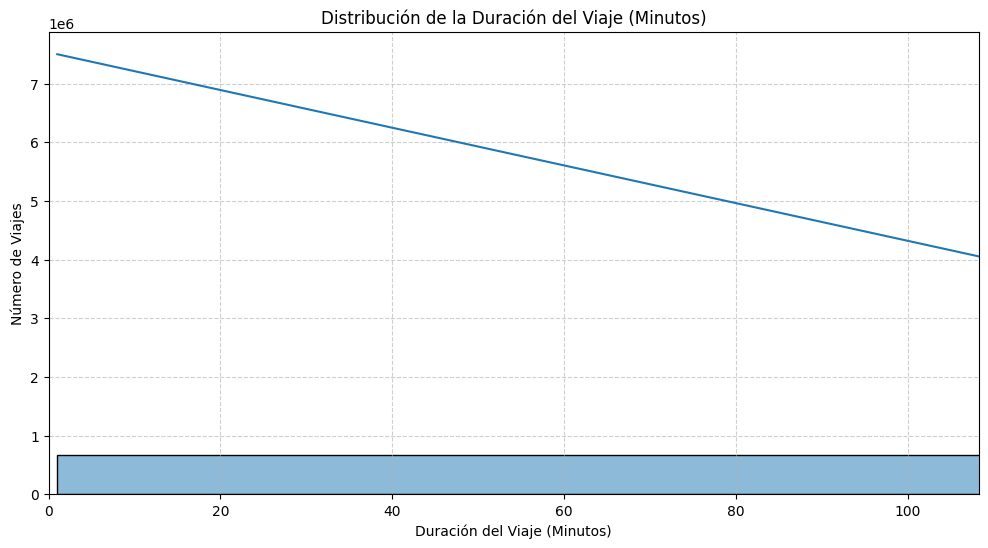

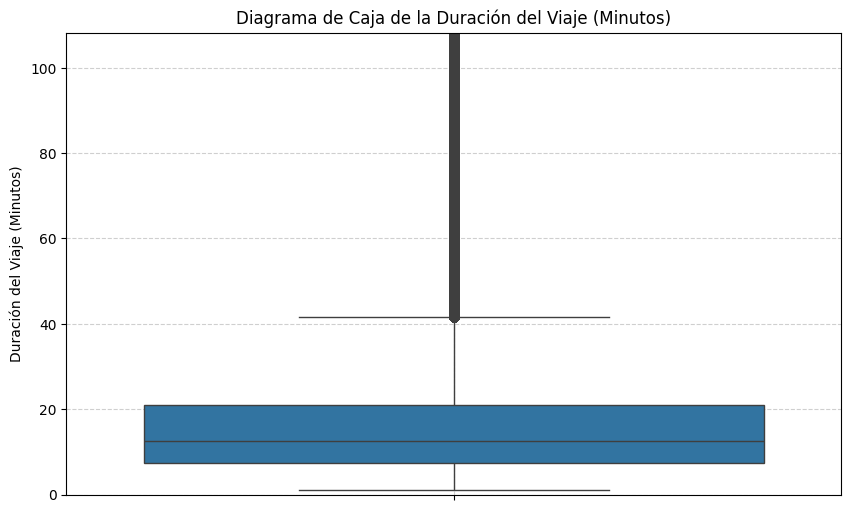

In [10]:
# Calcular la duración del viaje en segundos y minutos
df['trip_duration_seconds'] = (df['ended_at'] - df['started_at']).dt.total_seconds()
df['trip_duration_minutes'] = df['trip_duration_seconds'] / 60

# Filtrar viajes de menos de 60 segundos (1 minuto)
# Esto re-valida el paso de limpieza.
initial_trips = len(df)
df = df[df['trip_duration_seconds'] >= 60].copy()
print(f"\nSe filtraron {initial_trips - len(df)} viajes de menos de 60 segundos (1 minuto).")
print(f"El DataFrame ahora tiene {len(df)} filas después de filtrar viajes cortos.")

print("\nEstadísticas descriptivas para la Duración del Viaje (Minutos):")
print(df['trip_duration_minutes'].describe())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df['trip_duration_minutes'], bins=50, kde=True)
plt.title('Distribución de la Duración del Viaje (Minutos)')
plt.xlabel('Duración del Viaje (Minutos)')
plt.ylabel('Número de Viajes')
plt.xlim(0, df['trip_duration_minutes'].quantile(0.99)) # Limitar eje x para mejor visualización
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y=df['trip_duration_minutes'])
plt.title('Diagrama de Caja de la Duración del Viaje (Minutos)')
plt.ylabel('Duración del Viaje (Minutos)')
plt.ylim(0, df['trip_duration_minutes'].quantile(0.99))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 3. Extraer Características Temporales


Características temporales extraídas:
           started_at  start_hour start_day_of_week  start_day_of_month  \
0 2023-05-22 16:16:20          16            Monday                  22   
1 2023-05-24 08:34:32           8         Wednesday                  24   
2 2023-05-16 08:50:27           8           Tuesday                  16   
3 2023-05-16 14:29:21          14           Tuesday                  16   
4 2023-05-25 07:26:53           7          Thursday                  25   

  start_month  start_year  
0         May        2023  
1         May        2023  
2         May        2023  
3         May        2023  
4         May        2023  


/tmp/ipython-input-1404431926.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='start_hour', palette='viridis')


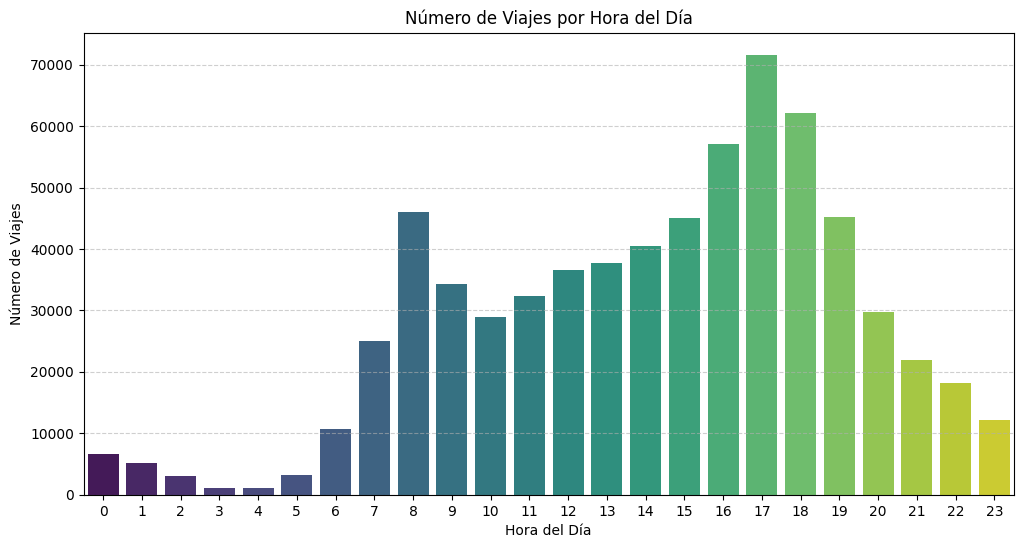

/tmp/ipython-input-1404431926.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='start_day_of_week', order=day_order, palette='viridis')


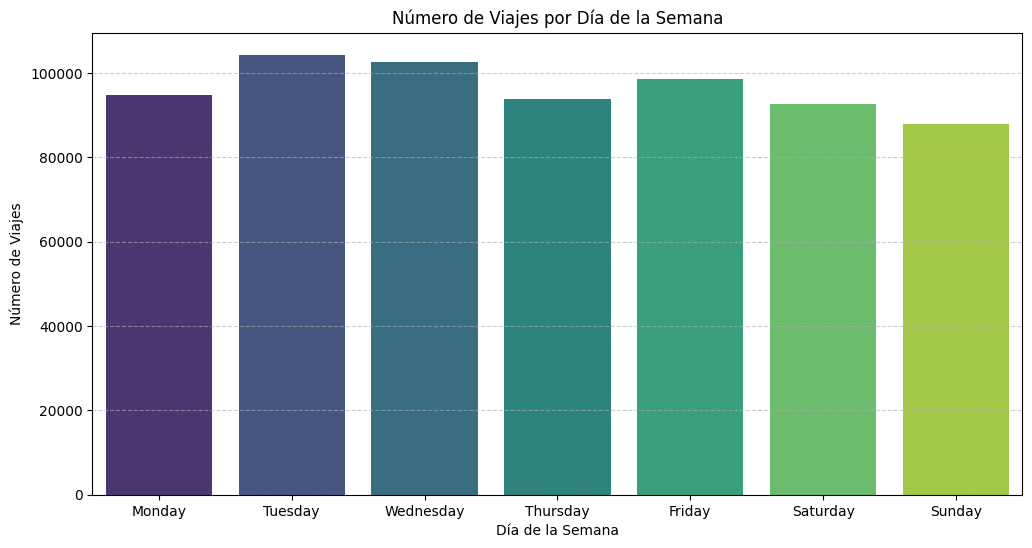

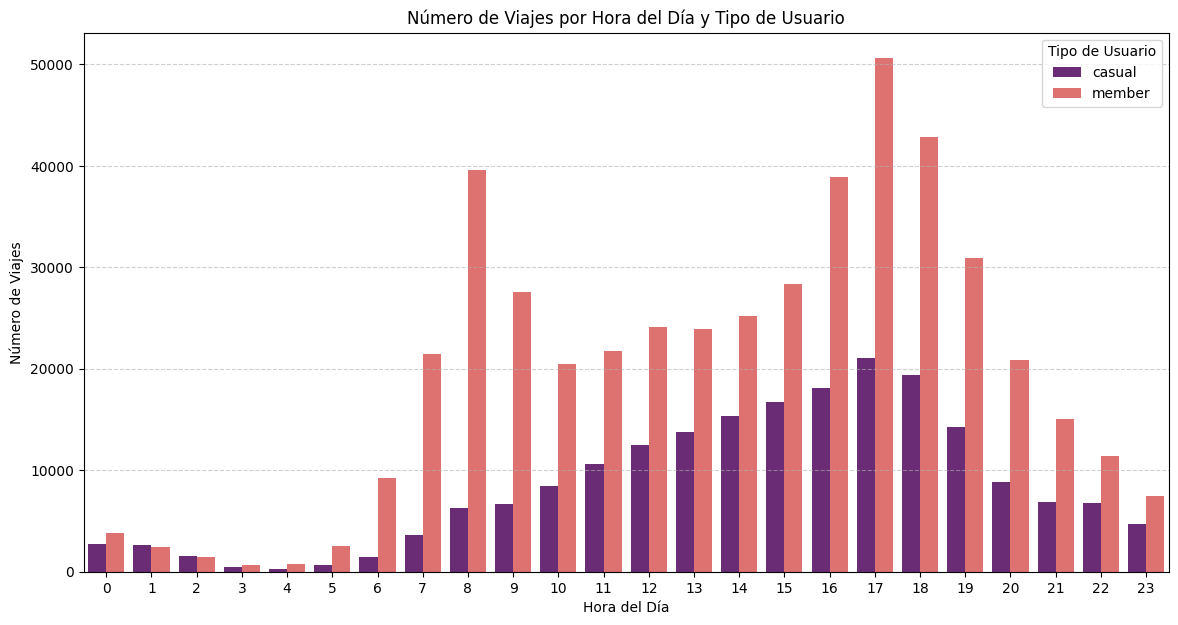

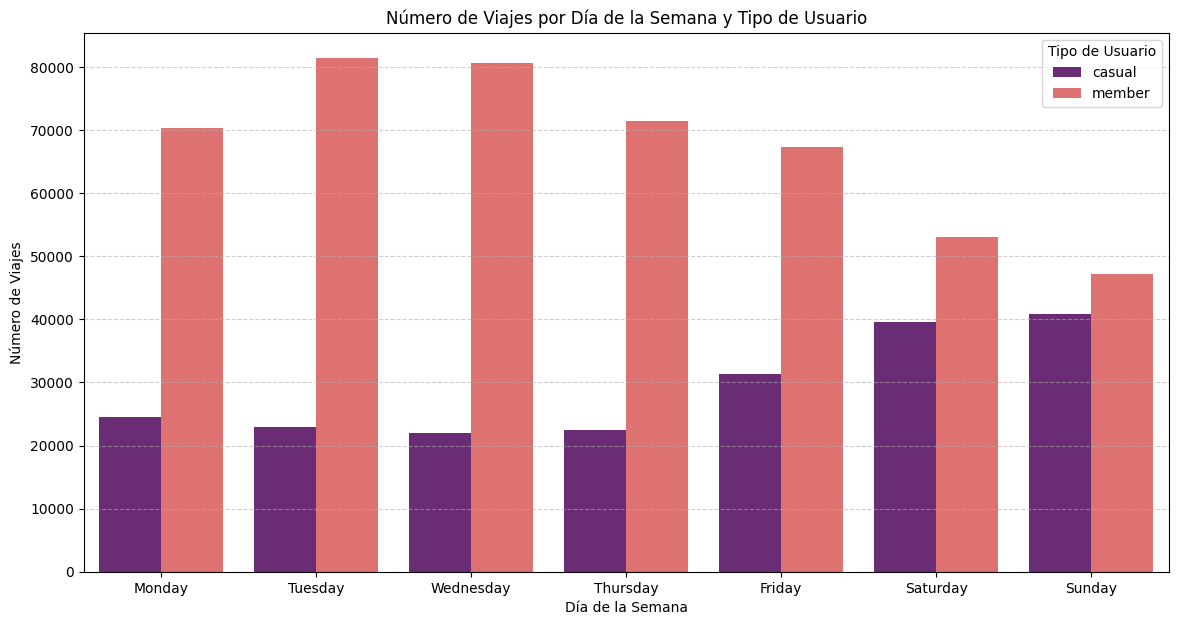

In [11]:
df['start_hour'] = df['started_at'].dt.hour
df['start_day_of_week'] = df['started_at'].dt.day_name() # Lunes, Martes, etc.
df['start_day_of_month'] = df['started_at'].dt.day
df['start_month'] = df['started_at'].dt.month_name()
df['start_year'] = df['started_at'].dt.year
print("\nCaracterísticas temporales extraídas:")
print(df[['started_at', 'start_hour', 'start_day_of_week', 'start_day_of_month', 'start_month', 'start_year']].head())

# Viajes por Hora del Día
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='start_hour', palette='viridis')
plt.title('Número de Viajes por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Viajes')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Viajes por Día de la Semana
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='start_day_of_week', order=day_order, palette='viridis')
plt.title('Número de Viajes por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Viajes')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Viajes por Hora del Día y Tipo de Usuario
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='start_hour', hue='member_casual', palette='magma')
plt.title('Número de Viajes por Hora del Día y Tipo de Usuario')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Viajes')
plt.legend(title='Tipo de Usuario')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Viajes por Día de la Semana y Tipo de Usuario
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='start_day_of_week', hue='member_casual', order=day_order, palette='magma')
plt.title('Número de Viajes por Día de la Semana y Tipo de Usuario')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Viajes')
plt.legend(title='Tipo de Usuario')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

## 4. Calcular la Distancia del Viaje (Fórmula de Haversine)


Estadísticas descriptivas para la Distancia del Viaje (km):
count    675232.000000
mean          2.022817
std           1.430619
min           0.000000
25%           1.033071
50%           1.675108
75%           2.698133
max          25.171313
Name: distance_km, dtype: float64


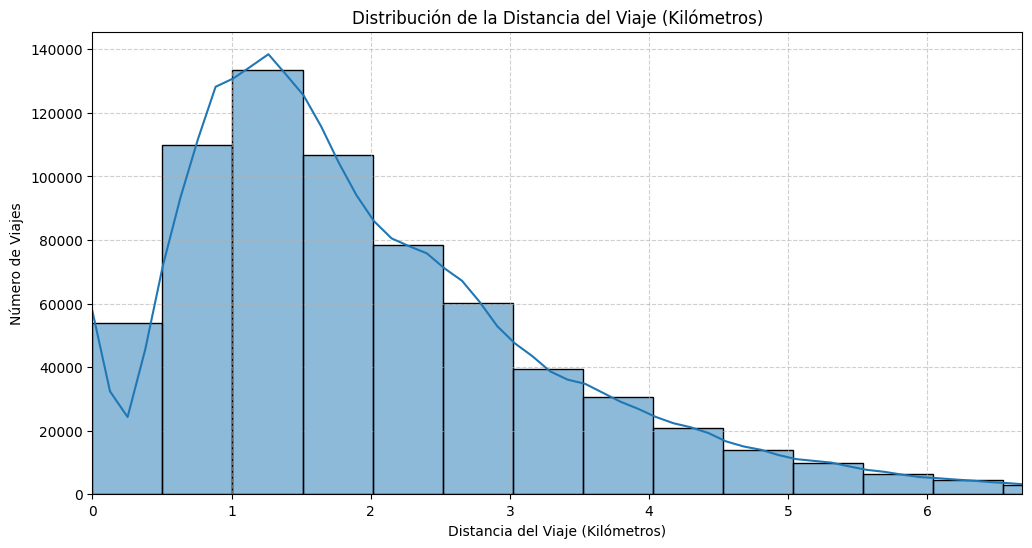

In [12]:
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371 # Radio de la Tierra en kilómetros

    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

df['distance_km'] = df.apply(lambda row: haversine(row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']), axis=1)

print("\nEstadísticas descriptivas para la Distancia del Viaje (km):")
print(df['distance_km'].describe())

plt.figure(figsize=(12, 6))
sns.histplot(df['distance_km'], bins=50, kde=True)
plt.title('Distribución de la Distancia del Viaje (Kilómetros)')
plt.xlabel('Distancia del Viaje (Kilómetros)')
plt.ylabel('Número de Viajes')
plt.xlim(0, df['distance_km'].quantile(0.99)) # Limitar eje x para mejor visualización
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## 5. Popularidad de las Estaciones

In [13]:
print("\nLas 10 Estaciones de Inicio Más Populares:")
print(df['start_station_name'].value_counts().head(10))

print("\nLas 10 Estaciones de Fin Más Populares:")
print(df['end_station_name'].value_counts().head(10))

# Popularidad General
overall_station_popularity = pd.concat([df['start_station_name'], df['end_station_name']]).value_counts()
print("\nLas 10 Estaciones Más Populares en General (Inicio + Fin):")
print(overall_station_popularity.head(10))

# Popularidad por Tipo de Usuario
print("\nLas 5 Estaciones de Inicio Principales para Miembros:")
print(df[df['member_casual'] == 'member']['start_station_name'].value_counts().head(5))
print("\nLas 5 Estaciones de Fin Principales para Miembros:")
print(df[df['member_casual'] == 'member']['end_station_name'].value_counts().head(5))

print("\nLas 5 Estaciones de Inicio Principales para Ciclistas Casuales:")
print(df[df['member_casual'] == 'casual']['start_station_name'].value_counts().head(5))
print("\nLas 5 Estaciones de Fin Principales para Ciclistas Casuales:")
print(df[df['member_casual'] == 'casual']['end_station_name'].value_counts().head(5))


Las 10 Estaciones de Inicio Más Populares:
start_station_name
MIT at Mass Ave / Amherst St                                        15335
Central Square at Mass Ave / Essex St                               11246
Harvard Square at Mass Ave/ Dunster                                 10952
Charles Circle - Charles St at Cambridge St                          8014
MIT Pacific St at Purrington St                                      7586
MIT Vassar St                                                        7445
Ames St at Main St                                                   7129
Christian Science Plaza - Massachusetts Ave at Westland Ave          6855
Boylston St at Massachusetts Ave                                     6224
Harvard University River Houses at DeWolfe St / Cowperthwaite St     5955
Name: count, dtype: int64

Las 10 Estaciones de Fin Más Populares:
end_station_name
MIT at Mass Ave / Amherst St                                        15366
Harvard Square at Mass Ave/ Dunster    

## 6. Comparación de Tipos de Usuario


Análisis de Tipo de Usuario:
  member_casual  trip_duration_minutes
0        casual              57.155769
1        member              15.604167
  member_casual  distance_km
0        casual     2.178157
1        member     1.955695


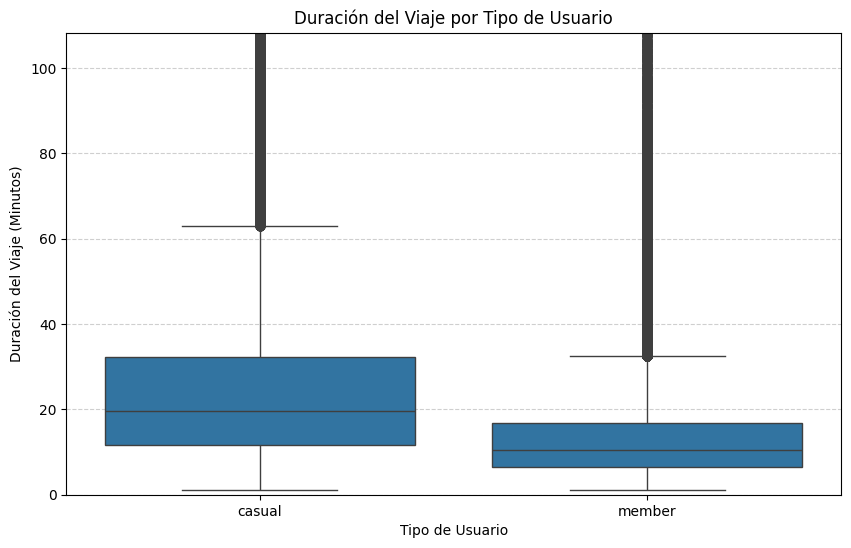

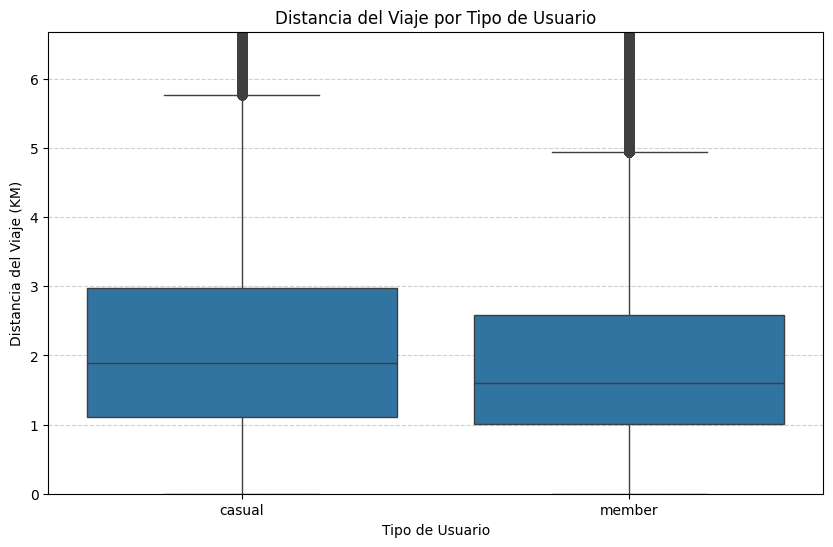

In [14]:
print("\nAnálisis de Tipo de Usuario:")
print(df.groupby('member_casual')['trip_duration_minutes'].mean().reset_index())
print(df.groupby('member_casual')['distance_km'].mean().reset_index())

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='member_casual', y='trip_duration_minutes')
plt.title('Duración del Viaje por Tipo de Usuario')
plt.xlabel('Tipo de Usuario')
plt.ylabel('Duración del Viaje (Minutos)')
plt.ylim(0, df['trip_duration_minutes'].quantile(0.99))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='member_casual', y='distance_km')
plt.title('Distancia del Viaje por Tipo de Usuario')
plt.xlabel('Tipo de Usuario')
plt.ylabel('Distancia del Viaje (KM)')
plt.ylim(0, df['distance_km'].quantile(0.99))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Fase 3: Análisis de la Relación entre Estaciones

## 1. Matriz / Flujo Origen-Destino (O-D)

In [15]:
print("\nAnálisis de Flujo Origen-Destino (O-D):")
od_flows = df.groupby(['start_station_name', 'end_station_name']).size().reset_index(name='trip_count')
od_flows = od_flows.sort_values(by='trip_count', ascending=False)
print("Las 10 Rutas (Pares O-D) Más Comunes:")
print(od_flows.head(10))

# Se podrían añadir aquí más visualizaciones como gráficos de red (por ejemplo, usando NetworkX) o
# mapas interactivos (por ejemplo, usando Plotly, Folium), pero requieren una configuración más compleja.


Análisis de Flujo Origen-Destino (O-D):
Las 10 Rutas (Pares O-D) Más Comunes:
                                      start_station_name  \
29942                Harvard Square at Mass Ave/ Dunster   
38671                                      MIT Vassar St   
22984                   Deerfield St at Commonwealth Ave   
38836                       MIT at Mass Ave / Amherst St   
5835                      Beacon St at Massachusetts Ave   
38793                       MIT at Mass Ave / Amherst St   
38874                       MIT at Mass Ave / Amherst St   
38533                                      MIT Vassar St   
38946                       MIT at Mass Ave / Amherst St   
31457  Harvard University Radcliffe Quadrangle at She...   

                                        end_station_name  trip_count  
29942  Harvard University Radcliffe Quadrangle at She...         868  
38671            MIT Stata Center at Vassar St / Main St         810  
22984                       MIT at Mass Ave / A

## 2. Análisis de Desequilibrio de Estaciones

In [16]:
print("\nAnálisis de Desequilibrio de Estaciones:")
# Calcular viajes iniciados desde cada estación
trips_started = df['start_station_name'].value_counts().rename('trips_started')
# Calcular viajes finalizados en cada estación
trips_ended = df['end_station_name'].value_counts().rename('trips_ended')

# Combinar en un único DataFrame para todas las estaciones
station_traffic = pd.concat([trips_started, trips_ended], axis=1).fillna(0)
station_traffic['net_flow'] = station_traffic['trips_started'] - station_traffic['trips_ended']

print("Las 10 Estaciones con mayor salida de bicicletas (más bicicletas saliendo que llegando):")
print(station_traffic.sort_values(by='net_flow', ascending=False).head(10))

print("\nLas 10 Estaciones con mayor entrada de bicicletas (más bicicletas llegando que saliendo):")
print(station_traffic.sort_values(by='net_flow', ascending=True).head(10))

# Ejemplo: Analizar el desequilibrio durante las horas pico de la mañana (por ejemplo, de 7 AM a 9 AM)
df_morning_peak = df[(df['start_hour'] >= 7) & (df['start_hour'] <= 9)].copy()
trips_started_morning = df_morning_peak['start_station_name'].value_counts().rename('trips_started_morning')
trips_ended_morning = df_morning_peak['end_station_name'].value_counts().rename('trips_ended_morning')

station_traffic_morning = pd.concat([trips_started_morning, trips_ended_morning], axis=1).fillna(0)
station_traffic_morning['net_flow_morning'] = station_traffic_morning['trips_started_morning'] - station_traffic_morning['trips_ended_morning']

print("\nLas 5 Estaciones con mayor salida de bicicletas durante la hora pico de la mañana (7-9 AM):")
print(station_traffic_morning.sort_values(by='net_flow_morning', ascending=False).head(5))

print("\nLas 5 Estaciones con mayor entrada de bicicletas durante la hora pico de la mañana (7-9 AM):")
print(station_traffic_morning.sort_values(by='net_flow_morning', ascending=True).head(5))


Análisis de Desequilibrio de Estaciones:
Las 10 Estaciones con mayor salida de bicicletas (más bicicletas saliendo que llegando):
                                              trips_started  trips_ended  \
MIT Vassar St                                        7445.0         6819   
Washington St at Egremont Rd                         1198.0          697   
University Park                                      4253.0         3816   
Government Center - Cambridge St at Court St         3207.0         2773   
Craigie at Summer St                                  779.0          362   
Broadway at Central St                                867.0          450   
One Beacon St                                        1039.0          622   
MIT Pacific St at Purrington St                      7586.0         7186   
The Overlook at St. Gabriel's                         557.0          164   
Somerville City Hall                                  959.0          569   

                                